<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 0 - Libraries</p>

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.1 - General Purpose</p>

In [1]:
import copy
import numpy as np
import pandas as pd
import random
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.2 - Exploration</p>

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.3 - Preprocessing</p>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.4 - Baseline</p>

In [4]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.5 - Neural Network</p>

In [5]:
import torch

from skorch import NeuralNetRegressor
from torch.utils.tensorboard import SummaryWriter

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.6 - Evaluation</p>

In [6]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.7 - Reproducibility</p>

In [7]:
torch.set_num_threads(1)

random_state = 42

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 1 - Story</p>

Introducing StreetEasy - reimagining the way people buy, sell, and rent real estate across New York City and New Jersey. Incorporating intuitive search tools and insightful data-driven content, we strive to bridge the gap between would-be renters or buyers and landlords. Whether you are listing or hunting, we will cater to your needs from start to finish. The use of data science in such catering is on the rise.

My role as a data scientist contributes to real estate marketing efforts, catering pricing strategies to stimulate seeker-landlord interactions. Current research centers around listing-based machine learning. An associated regression problem was introduced, involving the estimation of rental prices by neural networks. Real estate hotspot Manhattan constitutes the focal point of initial experiments.

Experiments for a suitable regressor, consulting multiple neural network architectures. Architectures are therefore explored in search of a reliable estimator. Reliability serves as an indicator for prospective project scaling. Scaling is desirable as reliable estimates, could drive pricing strategies, increasing landlord-tenant interaction. Resulting rise in traffic culminates in landlord interest, translating into greater revenue from listing fees.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 2 - The Data</p>

The following chapter details the __[dataset](https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset/data)__ considered for the regression experiment. More specifically, it will be outlined what it consists of and how it might fit within the experiment context. Should the __[dataset](https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset/data)__ appear valid according to that outline, it will be used in the experiment.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.1 - Features</p>

<center>

|Feature|Description|
|:----:|:----:|
|rental_id|Identifier unique to the rental listing.|
|rent|Price of the rental listing in US dollars per month.|
|bedrooms|Bedrooms located within the rental listing.|
|bathrooms|Bathrooms located within the rental listing.|
|size_sqft|Size of the rental listing in square feet.|
|min_to_subway|Distance of the rental listing to a subway station in minutes.|
|floor|Level within the building on which the rental listing is located.|
|building_age_yrs|Time elapsed since the construction of the building for the rental listing in years.|
|no_fee|Denotes the presence of charges associated with potential brokers for the rental listing.|
|has_roofdeck|Denotes the presence of a flat, terraced roof section on the rental listing building.|
|has_washer_dryer|Denotes the presence of a machine dedicated to washing and drying cloth within the rental listing.|
|has_doorman|Denotes the presence of staff dedicated to regulating access to the rental listing building.|
|has_elevator|Denotes the presence of a room dedicated to ferrying passengers up and down the rental listing building.|
|has_dishwasher|Denotes the presence of a machine dedicated to washing dishes within the rental listing.|
|has_patio|Denotes the presence of a solid-floored outside area adjoining the ground floor of the rental listing building.|
|has_gym|Denotes the presence of an area equipped with exercise tools within the rental listing building.|
|neighborhood|Geographic subarea of a borough where the rental listing building is located.|
|borough|Division of New York City where the rental listing building is located.|

</center>

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.2 - Experiment Context</p>

StreetEasy's real estate vertical constitutes the subject of the __[dataset](https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset/data)__, whose instances are labelled with rent rates. Features define property details, whereas instances reflect observed rental listings. Those rental listings observed pertain exclusively to the Manhattan borough.

In light of the property details, input features, for pattern recognition, may be available. As these are features of rental properties in Manhattan, the vertical requirement is met. Moreover, rental rate-labeled instances, posing targets, are at disposal, enabling regression tasks. This provides a sound base to engineer neural networks, solving the desired regression problem.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.3 - Loading Dataset</p>

In [8]:
df = pd.read_csv(filepath_or_buffer = "manhattan.csv")

In this cell, the relevant dataset for the regression experiment is read and stored as df.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 - IDA</p>

The upcoming chapter lays the groundwork for explanatory analysis and preprocessing. Hence, an overview of the __[dataset](https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset/data)__'s structural, qualitative, and statistical properties is established. Starting with the basic structure, as shown below.

In [9]:
df.head(10)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
5,10817,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,Manhattan
6,9077,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,Midtown East,Manhattan
7,5150,2995,0.0,1,579,6,21.0,33,0,0,0,0,0,0,0,0,Battery Park City,Manhattan
8,9507,15000,2.0,2,1715,0,30.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
9,1437,4650,1.0,1,915,5,5.0,106,0,0,0,0,0,0,0,0,Upper East Side,Manhattan


The features **_rental_id_**, **_neighborhood_**, and **_borough_** immediately catch the eye. **_Rental_id_** introduces redundancy to the index, granting discriminatory power in accessing. Yet no discriminatory power relating to the regression problem, causing noise. While **_borough_** is supposedly exclusive to Manhattan, implying absence of discriminatory power. Such a borough consists of neighborhoods, categorical by nature and thereby vulnerable to rare occurrences.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


Each of the 3,539 instances boasts these features along with others (rental properties) and a target (rent rate). Qualitative concerns relating to not a number occurences can thus be dismissed. Present occurrences demonstrate further meaningful data typing.

In [11]:
df.describe().iloc[1:]

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The distributions of occurrences suggest the presence of outliers, particularly in features such as **_bedrooms_**, **_bathrooms_**, **_size_sqft_**, **_min_to_subway_**, and **_floor_**, as well as in the target (**_rent_**). As notably, both the minimum and the three quartiles tend to be closely situated as compared to the maximum. Outlier density varies, tending to be greater as standard deviations approach means. Nearer these means are to the third quartile, the more extreme the trend. All other non-binary distributions fall within non-alarming ranges. Binary features do not prove overwhelmingly true, indicative of their discriminative power.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 - EDA, Preprocessing</p>

This chapter concerns the preprocessing of features and targets, in preparation for downstream baselines and neural networks. Preprocessing assumes further investigation at the granularity level of a feature or target, based in part on previously acquired evidence.

Among these features, **_rental_id_**, **_neighborhood_**, and **_borough_** stood out. **_Rental_id_** and **_borough_** were to be discarded for their discriminatory power. Manhattan should, however, be verified as the only borough, so as not to contaminate, introducing noise.

In [12]:
#check for duplicate instances
len(df[df.duplicated(keep = False)])

0

In [13]:
#check if single borough apparent
print(df["borough"].nunique())

1


In [14]:
df.drop(
    columns = [
        "rental_id",
        "borough"
    ],
    inplace = True
)

Assumptions about a single borough are verified, giving rise to the drop. However, dropping should be performed following a duplicate instance check. A critical step, as duplicates falsely emphasize patterns, introducing bias. Yet no duplicates exist.

In [15]:
df["neighborhood"].value_counts()

neighborhood
Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Stuyvesant Town/PCV      3
Little Italy             3
West Harlem              2
Manhattanville           1
Name: count, dtype: int64

While rare occurrences were probable to arise in neighborhoods, as validated by a check. Those should be treated as a measure of downstream split representativeness. In doing so grasp of variations shall be balanced with discriminatory power.

In [16]:
df = (df[df["neighborhood"] != "Long Island City"]
      .replace(
          to_replace = {
              "Battery Park City": "community_board_1",
              "Financial District": "community_board_1",
              "Tribeca": "community_board_1",
              "Greenwich Village": "community_board_2",
              "Little Italy": "community_board_2",
              "Nolita": "community_board_2",
              "Soho": "community_board_2",
              "West Village": "community_board_2",
              "Chinatown": "community_board_3",
              "East Village": "community_board_3",
              "Lower East Side": "community_board_3",
              "Chelsea": "community_board_4",
              "Midtown West": "community_board_4",
              "Central Park South": "community_board_5",
              "Flatiron": "community_board_5",
              "Midtown": "community_board_5",
              "Midtown South": "community_board_5",
              "Gramercy Park": "community_board_6",
              "Midtown East": "community_board_6",
              "Stuyvesant Town/PCV": "community_board_6",
              "Upper West Side": "community_board_7",
              "Upper East Side": "community_board_8",
              "Roosevelt Island": "community_board_8",
              "Hamilton Heights": "community_board_9",
              "Manhattanville": "community_board_9",
              "Morningside Heights": "community_board_9",
              "West Harlem": "community_board_9",
              "Central Harlem": "community_board_10",
              "East Harlem": "community_board_11",
              "Inwood": "community_board_12",
              "Washington Heights": "community_board_12"
          }
      )
)

Community boards, sharing advisory roles in areas such as city budgets or municipal service delivery, allow for such a balance. Neighborhoods are, therefore, relegated in granularity to community boards. With Long Island City specifically excluded due to its affiliation with Queens, causing noise prior mentioned.

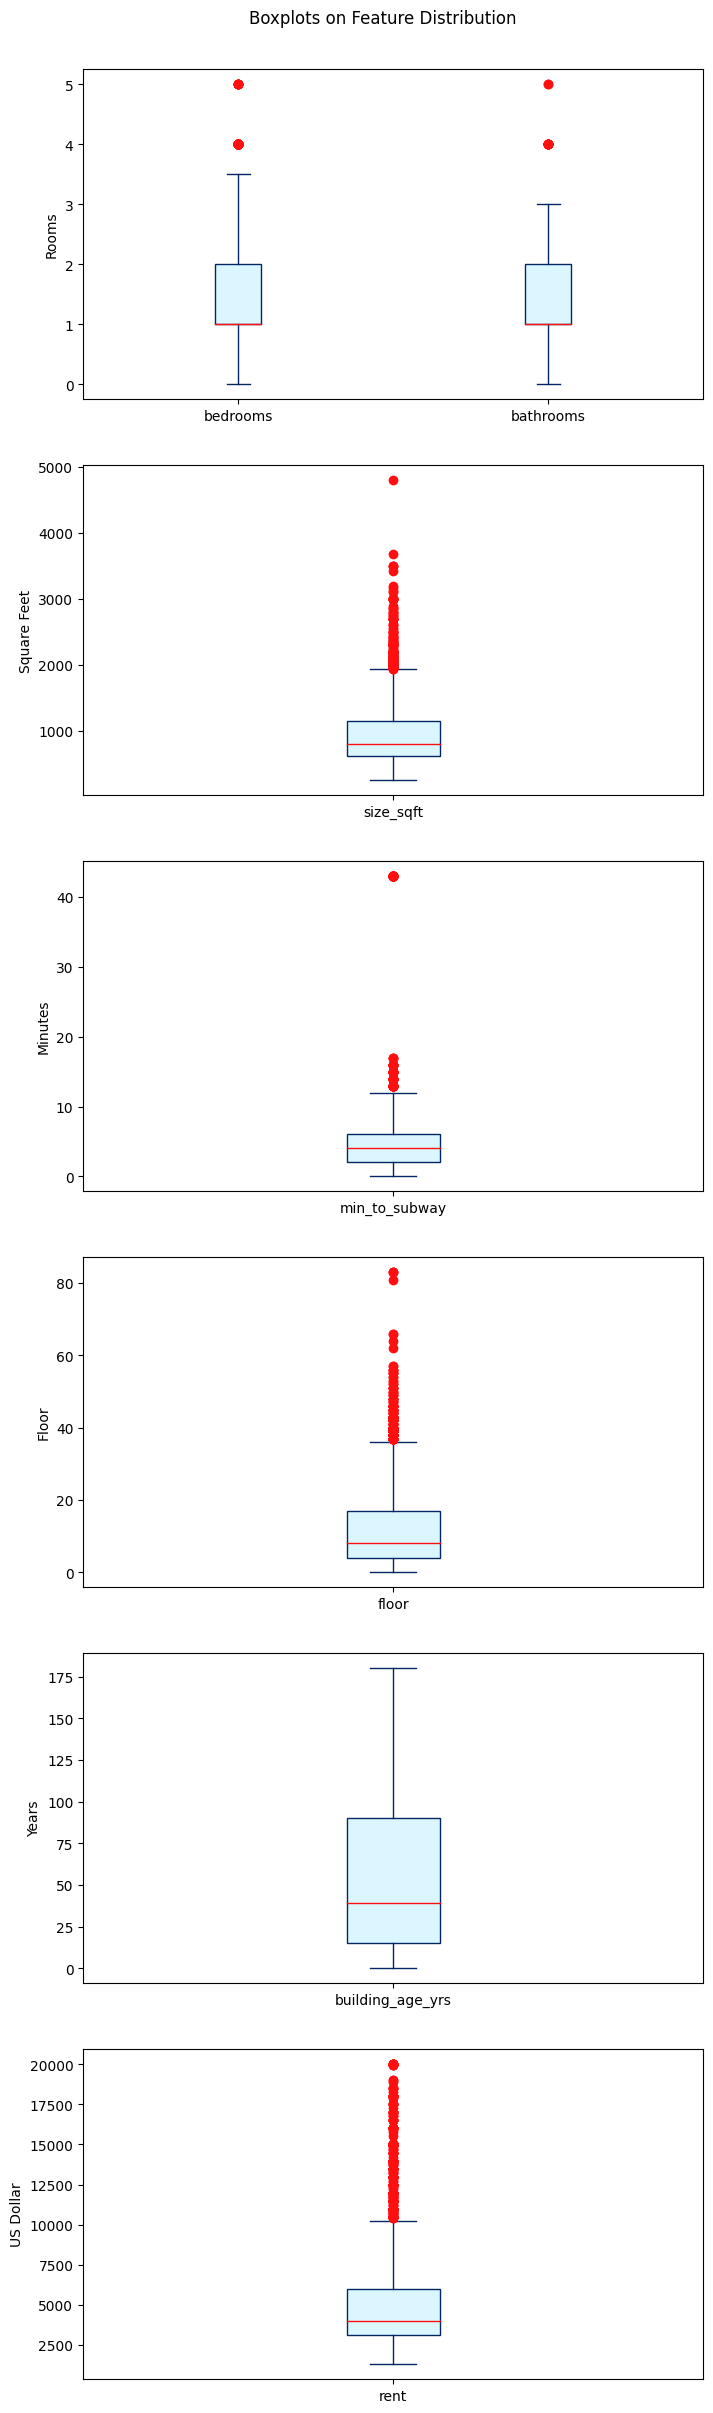

In [17]:
title = "Boxplots on Feature Distribution"

feats = [
    df[["bedrooms", "bathrooms"]], 
    df[["size_sqft"]], 
    df[["min_to_subway"]],
    df[["floor"]],
    df[["building_age_yrs"]],
    df[["rent"]]
]

labels = [
    "Rooms",
    "Square Feet",
    "Minutes",
    "Floor",
    "Years",
    "US Dollar"
]

num = len(feats)
fig, axs = plt.subplots(nrows = num, 
                        ncols = 1, 
                        figsize = (8, (num * 5)))
for ax, feat, label in zip(axs, feats, labels):
    ax.boxplot(
        x = feat,
        labels = feat.columns,
        patch_artist = True,
        boxprops = dict(
            facecolor = "#dcf6ff",
            edgecolor = "#032765"
        ),
        capprops = dict(
            color = "#032765"
        ),
        flierprops = dict(
            markerfacecolor = "#ff0f0f",
            markeredgecolor = "#ff0f0f"
        ),
        medianprops = dict(
            color = "#ff0f0f"
        ),
        whiskerprops = dict(
            color = "#032765"
        )
    );
    ax.set_ylabel(ylabel = label);
fig.suptitle(t = title,
             y = 0.9);

Continuous features and target on the other hand raised suspicions regarding outlier affections. Assumptions ascribed seem valid in light of the boxplots presented.

In [18]:
feats = df.iloc[:, 1:]
df_dup = (df.loc[feats[feats.duplicated(keep = False)].index]
          .groupby(
              by = list(
                  feats.columns
              )
          )
          .agg(
              func = {
                  "rent": ["min", "max"]
              }
          )
          .reset_index(
              drop = True 
          )
)
df_dup[(df_dup[("rent", "min")] != df_dup[("rent", "max")])]

rent       
      min    max
1    3299   3308
8    1600   1790
9    2595   2750
10   2600   2650
11   3999   4400
13   7495   7795
15   3340   3545
16   2595   2600
18   3400   3650
19   3150   3300
23   7500   8150
24   4900   4950
25   2495   2500
27   2700   2750
28   5995   6495
30   7995   8995
31   4795   5295
38   6200   6400
39  14950  17000

An outlier, sharing a conflicting duplicate with a non-outlier, would cause downstream struggle. Struggle, as in attempts to minimize overall error, leading to compromises not fair to either end. Given the foregoing context, contradictory duplicates should be sought. By doing so, 19 contradictory duplicate groups were found. However, all of them pose insignificant variations, allowing regressor coping.

In [19]:
tars = df.loc[:, ["rent"]]
feats = df.drop("rent", 
                axis = 1)

Preprocessed features and target are subsequently separated to be split downstream.

In [20]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    feats, 
    tars, 
    test_size = 0.2, 
    shuffle = True, 
    stratify = feats["neighborhood"], 
    random_state = random_state
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, 
    y_train_full, 
    test_size = 0.25, 
    shuffle = True, 
    stratify = X_train_full["neighborhood"],
    random_state = random_state
)

Splitting is performed as evaluation of a model should not be conducted with the same data as training. By evaluating based on training data, data is more likely to be memorized rather than capturing underlying patterns. Memorization comes at the expense of generalizability to unseen data, leading to overfitting. 

Deep learning involves two instances of evaluation. First, evaluation for determination of training's optimal state. Secondly, evaluation of the optimal state, as data leakage occurs due to the determination described.

As part of the hyperparameters, shuffle was enabled to mitigate potential order bias, which may be introduced by the original order of instances. The split of 60% training, 20% validation, and 20% test was chosen. 3,539 instances drive such decision, necessitating greater proportions of training required to capture patterns, with sufficient evaluation sizes to ensure reliable quality. 

Further consideration should be given to the community boards, encapsulating a range of factors, justifying premiums or concessions. The way to ensure fair representation is by stratification, preventing undercoverage bias.

Split scaling is imperative for linear regression and neural networks. Given the sensitivity of the underlying optimizations to feature magnitudes. Sensitively, as greater magnitude coincides with stronger weight implications. Models with large weights tend to be unstable, causing poor learning performance and higher generalization errors. Large weights may also result from high error gradients caused by the target magnitude in neural networks, assuming its scaling. As a step towards scaler selection, features are further tested.

In [21]:
round_lim = 10
pd.DataFrame(data = [
    {
        "feature": feat,
        "sw_test": np.round(
            stats.shapiro(x = df[feat])[1], 
            round_lim
        ),
        "ks_test": np.round(
            stats.kstest(rvs = df[feat], cdf = "norm")[1], 
            round_lim
        )
    }
    for feat in df.iloc[:, :7]
])

,feature,sw_test,ks_test
0,rent,0.0,0.0
1,bedrooms,0.0,0.0
2,bathrooms,0.0,0.0
3,size_sqft,0.0,0.0
4,min_to_subway,0.0,0.0
5,floor,0.0,0.0
6,building_age_yrs,0.0,0.0


Distribution curves of features are therefore evaluated for Gaussian shape adherence. Indications of Gaussian distributions are drawn by the Shapiro-Wilk and Kolmogorow-Smirnow tests. Binary features are omitted within those tests, as Gaussian constitutes a continuous distribution probability. Tests yield p-values close to zero, well below the significance level of 0.05. Gaussian distribution appears thus unlikely.

Standard scalers assume, however, such Gaussian distributions. As a consequence, underlying z-scores may be miscentering, causing potential significance bias. Min-max scalers are, by contrast, prone to outliers due to their direct influence. Thus, an outlier may raise the maximum, narrowing majorities, which causes information loss. Those conditions favor the robust scaler.

In [22]:
class preparation():
    def __init__(self, feats_dfs, tars_dfs, scaler):
        self.feats_dfs = feats_dfs
        self.tars_dfs = tars_dfs
        self.scaler = scaler

    #initialize scaler
    def init_scaler(self, df):
        scaler = self.scaler
        return scaler.fit(df)

    #dummy encode input
    def dummify(self, df, dmy_cols):
        return pd.get_dummies(
            data = df,
            columns = dmy_cols,
            drop_first = True,
            dtype = int
        )
    
    #cast scaled input to tensor
    def transform(self, df, scaler):
        return torch.Tensor(scaler.transform(df))
    
    #dummify, scale, and transform features
    def prep_feats(self, fit_index, dmy_cols):
        self.feats_scaler = self.init_scaler(
            self.dummify(self.feats_dfs[fit_index], dmy_cols)
        )
        self.feats = [
            self.transform(self.dummify(df, dmy_cols), self.feats_scaler)
            for df in self.feats_dfs
        ]
    
    #scale and transform targets
    def prep_tars(self, fit_index):
        self.tars_scaler = self.init_scaler(self.tars_dfs[fit_index])
        self.tars = [
            self.transform(df, self.tars_scaler)
            for df in self.tars_dfs
        ]
    
feats_dfs = [
    X_train_full,
    X_train,
    X_val,
    X_test
]

tars_dfs = [
    y_train_full,
    y_train,
    y_val,
    y_test
]

prep = preparation(feats_dfs, tars_dfs, RobustScaler())

def prep_wrapper(fit_index):
    prep.prep_feats(fit_index, ["neighborhood"])
    prep.prep_tars(fit_index)

Feature scaling requires **_neighborhood_** treatment, performed at a downstream stage to allow stratification. Community boards within **_neighborhood_** are largely independent, suggesting dummy encoding. Once encoded, scaling can take place. Scalers themselves are fitted on training and validation data for features and targets, respectively. Test data is deliberately excluded to prevent data leakage.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 5 - Baselines</p>

Baselines are explored in the following chapter, as a reference for sanity in later, more complex approaches. Such baselines are rooted in dummy and simple machine learning models, built on previously preprocessed data.

In [23]:
prep_wrapper(1)

It is crucial to note that the preprocessed data's scaler exclusively fits on the training partition. As the validation partition does not actively engage in training, introducing data leakage at no value.

In [24]:
#predict target based on dummy regressor
def dmy_preds(reg_dmy, ptns_feats):
    return [
        (
            torch.Tensor(
                reg_dmy.predict(X = ptn_feats)
            )
            .unsqueeze(1)
        )
        for ptn_feats in ptns_feats
    ]

#construct and train dummy regressor
dmy_baseline = (
    DummyRegressor(
        strategy = "median"
    )
    .fit(prep.feats[1], y_train)
)

dmy__preds = dmy_preds(dmy_baseline, prep.feats[1:])

Scaled data serves first the most basic baseline of a dummy regressor. Strategy choice for such regressor is driven by outliers and their impact on the central tendency, suggesting median. Medians establish robustness, as opposed to outlier-skewed means. As the median depends upon the targets, feature scaling has no bearing, negating additional preparation efforts.

In [25]:
#predict target based on ml regressor
def ml_preds(reg_ml, ptns_feats):
    return [
        reg_ml.predict(ptn_feats)
        for ptn_feats in ptns_feats
    ]

#construct and train linear regressor
ml_baseline = (
    LinearRegression()
    .fit(
        X = prep.feats[1],
        y = y_train
    )
)

ml__preds = ml_preds(ml_baseline, prep.feats[1:])

Linear regression serves as the machine learning counterpart to the dummy regressor. Particularly, this algorithm for its simplicity, often regarded as industry standard for regression baselines. Those baselines constitute predictions. Assumed predictions are emitted for training, validation and testing according to both approaches.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 6 - Deep Learning Experiments</p>

This chapter delves into the exploration of neural networks as rental rate estimators. By doing so, architecture spectrums are investigated, guiding hyperparameter optimization.

In [26]:
class MultiLayerPerceptron(torch.nn.Module):
    def __init__(self, layers, activation):
        super(MultiLayerPerceptron, self).__init__()
        self.hidden_layers = torch.nn.ModuleList(
            [
                torch.nn.Linear(*layer)
                for layer in layers
            ]
        )
        self.activation = activation
    
    #predict target based on neural network
    def forward(self, ptn_feats):
        for layer in self.hidden_layers[:-1]:
            ptn_feats = self.activation(layer(ptn_feats))
        return self.hidden_layers[-1](ptn_feats)

Architecture refers to the composition of a multilayer perceptron. Composition may vary across layers, neurons, and activation functions.

In [27]:
class model_trainer():

    ########################################################################################################################
    #initialize class attributes
    ########################################################################################################################

    #partitions and reproducibility
    def __init__(self, X_train_full, X_train, X_val, y_train_full, y_train, y_val, y_scaler):
        self.X_train_full = X_train_full
        self.X_train = X_train
        self.X_val = X_val
        self.y_train_full = y_train_full
        self.y_train = y_train
        self.y_val = y_val
        self.y_scaler = y_scaler

        self.random_state = 42

    #reproducibility
    def init_seeds(self):
        random.seed(42)
        torch.manual_seed(42)

    #hyperparameters
    def init_hparms(self, criterion, es_threshold, es_patience, opt_eval, train_eval, learning_rate, max_epochs, optimizer):
        self.init_seeds()
        self.criterion = criterion
        self.es_threshold = es_threshold
        self.es_patience = es_patience
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.train_eval = train_eval
        self.optimizer = optimizer
        self.opt_eval = opt_eval

    #update class attributes
    def updt_hparms(self, **kwargs):
        self.init_seeds()
        for key, value in kwargs.items():
            setattr(self, key, value)

    ########################################################################################################################


    ########################################################################################################################
    #shortcuts
    ########################################################################################################################

    #display table row
    def print_row(self, data_points, spaces):
        return "".join(
            f"|{data_point:^{space}}|" 
            for data_point, space in zip(data_points, spaces)
        )

    #display grid lines
    def print_seps(self, seps):
        return "-" * seps
    
    #deepcopy neural network
    def copy_model(self, model):
        return copy.deepcopy(model.state_dict())

    ########################################################################################################################


    ########################################################################################################################
    #compute estimation
    ########################################################################################################################

    #estimate loss metric
    def preds_loss(self, model, ptn_feats, ptn_tars):
        ptn_preds = model(ptn_feats)
        return ptn_preds, self.criterion(
            ptn_preds,
            ptn_tars
        )
    
    #unscale estimations
    def inv_preds(self, ptn_preds, scaler):
        return [
            scaler.inverse_transform(X = ptn_pred)
            for ptn_pred in ptn_preds
        ]
    
    #estimate evaluation metric (e.g., MAPE)
    def preds_eval(self, ptn_tars, ptn_preds):
        return self.train_eval(
            *self.inv_preds(
                [ptn_tars, ptn_preds],
                self.y_scaler
            )
        )
    
    #estimate target
    def dl_preds(self, model, ptns_feats):
        model.eval()
        with torch.no_grad():
            return [
                model(ptn_feats)
                for ptn_feats in ptns_feats
            ]
        
    ########################################################################################################################


    ########################################################################################################################
    #train neural network
    ########################################################################################################################

    def train(self, identifier, model, worst_loss, worst_eval, round_lim):

        #intitialize default
        self.init_seeds()
        optimizer = self.optimizer(
            params = model.parameters(),
            lr = self.learning_rate
        )
        es_epoch, es_patience, es_loss = 0, 0, worst_loss
        self.best_model = self.copy_model(model)
        self.best_epoch = 0
        self.best_loss, self.best_eval = worst_loss, worst_eval
        ####################################################################################################################

        writer = SummaryWriter()

        #display table head 
        mtrc_size = np.round(random.random(), round_lim)
        col_names = [
            "Epoch", 
            "Training Loss", 
            "Validation Loss", 
            "Training Evaluation", 
            "Validation Evaluation"
        ]
        spaces = [
            max(
                [
                    len(str(ptn_arg))
                    for ptn_arg in ptn_args
                ]
            ) + 2
            for ptn_args in [
                 [col_names[0], self.max_epochs],
                 *[
                      [
                           ptn_arg, mtrc_size
                      ]
                      for ptn_arg in col_names[1:]
                 ]
            ]
        ]
        seps = sum(spaces) + 2 * len(spaces)
        head = [
            self.print_seps(seps), 
            f"|{identifier:^{seps - 2}}|", 
            self.print_seps(seps), 
            self.print_row(col_names, spaces), 
            self.print_seps(seps)
        ]
        for function in head:
            print(function)
        ####################################################################################################################

        #optimize
        while (es_epoch := es_epoch + 1) < self.max_epochs and (es_patience := es_patience + 1) <= self.es_patience:
            model.train()
            _, train_loss = self.preds_loss(
                model, self.X_train, self.y_train
            )
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
        ####################################################################################################################

            #judge optimization
            model.eval()
            with torch.no_grad():
                y_train_preds, train_loss = self.preds_loss(
                    model, self.X_train, self.y_train
                )
                y_val_preds, val_loss = self.preds_loss(
                    model, self.X_val, self.y_val
                )
                writer.add_scalars(
                    "experiments_loss",
                    {"train": train_loss.item(),
                     "val": val_loss.item()},
                    es_epoch
                ) 
                train_eval = self.preds_eval(
                    self.y_train, y_train_preds
                )
                val_eval = self.preds_eval(
                    self.y_val, y_val_preds
                )
                writer.add_scalars(
                    "experiments_eval", 
                    {"train": train_eval,
                     "val": val_eval},
                    es_epoch
                ) 
                writer.flush()

                #store best optimal state
                if val_eval < self.best_eval:
                    self.best_model = self.copy_model(model)
                    self.best_epoch = es_epoch
                    self.best_loss, self.best_eval = val_loss.item(), val_eval

                #patience counter reset
                if val_loss + self.es_threshold < es_loss:
                    es_loss, es_patience = val_loss, 0
            ################################################################################################################

        #display training progress
            if es_epoch == 1 or es_epoch % 10 == 0:
                data_points = [
                    es_epoch,
                    *[
                        np.round(ptn_mtrc, round_lim)
                        for ptn_mtrc in [
                            train_loss.item(),
                            val_loss.item(),
                            train_eval,
                            val_eval
                        ]
                    ]
                ]
                print(self.print_row(data_points, spaces))
        print(self.print_seps(seps))
        ####################################################################################################################

        writer.close()

    ########################################################################################################################
        

    ########################################################################################################################
    #optimize neural network
    ########################################################################################################################
        
    #construct estimator
    def init_estimator(self, estimator, dflt_lays, dflt_act):
        self.estimator =  NeuralNetRegressor(
            module = estimator,
            module__layers = dflt_lays,
            module__activation = dflt_act,
            criterion = self.criterion,
            optimizer = self.optimizer,
            lr = self.learning_rate,
            max_epochs = self.max_epochs,
            batch_size = -1,
            train_split = None,
            predict_nonlinearity = None,
            verbose = 0
        )

    #identify best hyperparameters
    def optimize(self, grid, splts, reps):

        #setup cross validated grid search
        self.reg = GridSearchCV(
            estimator = self.estimator,
            param_grid = grid,
            scoring = self.opt_eval,
            n_jobs = -1,
            refit = True,
            cv = RepeatedKFold(
                n_splits = splts,
                n_repeats = reps,
                random_state = self.random_state
            ),
            verbose = 1
        )

        #intitialize cross validated grid search
        self.reg.fit(
            X = self.X_train_full,
            y = self.y_train_full
        )
    
    ########################################################################################################################

As a multilayer perceptron is trained, neuron weights and biases are optimized. Optimization relies on the Adam optimizer, the industry's go-to. The go-to, owing to its stabilizing correction of initialization bias, coupled with dynamic learning rates at each parameter. Its application occurs across numerous epochs, here 1000 as a common default. 1000 to presumably permit ample room for optimization. Such room exhaustion is regulated via early stoppage, for the sake of runtime. Early stoppage triggered by validation loss following a period of insufficient improvement. The period under consideration is defined by patience at a default setting of five, striking an assumed balance between premature stoppage and time spent on plateus. Insufficient improvement within those periods is equated to an absence of improvement, due to reasonable computational overhead being expected. Improvement as measured by a mean absolute error _(L1)_ loss criterion. Mean squared error _(MSE)_ was deemed inequitable, due to outlier sensitivity. In light of the fact that greater errors are penalized with greater losses, minimized by the optimizer, resulting in outlier bias. Loss measured in validation as optimized based on training, with overfitting eventually taking precedence at the expense of runtime. Optimization based on training entails several steps. First, a forward pass is performed, yielding predictions, compared to a ground truth manifested in loss. Gradients are then computed and accumulated by back propagation, the more efficient counterpart to forward propagation. Final optimization is rooted in those accumulated gradients, presuming the erasure of those prior to the current epoch. For optimization purposes, each loss and evaluation begins with an infinity value. Infinity as to gurantee capture of virtually every initial encounter as improvement. The optimal state is determined by the mean absolute percentage error _(MAPE)_. As _MAPE_ gauges diverse target groups. Considering that, deviations among target groups with lower budgets may be small in absolute terms, yet still relevant, given the global stimulation intentions of landlord-tenant interactions. During evaluation, multilayer perceptron mode shall be set to eval, accounting for potential differences in behaviors. At present, no action would be required, however in anticipation of multilayer perceptron changes. In this sense, optimization also takes place in train mode. All metrics accumulated after optimization are written to the tensorboard for live monitoring, allowing early detection of problems during training.

In [28]:
prep_wrapper(0)
trainer = model_trainer(
    *prep.feats[:-1],
    *prep.tars[:-1],
    prep.tars_scaler
)

trainer.init_hparms(
    criterion = torch.nn.L1Loss(),
    es_threshold = 0,
    es_patience = 5,
    opt_eval = "",
    train_eval = mean_absolute_percentage_error,  
    learning_rate = 0.01, 
    max_epochs = 1000,
    optimizer = torch.optim.Adam, 
)

def model_trainer_wrapper(identifier, layers, activation):

    #construct neural network
    model = MultiLayerPerceptron(
        layers = layers, 
        activation = activation
    )

    #train neural network
    trainer.train(
        identifier = identifier,
        model = model,
        worst_eval = float("inf"),
        worst_loss = float("inf"),
        round_lim = 8
    )

    #retrieve best neural network
    model.load_state_dict(trainer.best_model)

    #estimate predictions
    return trainer.inv_preds(
        trainer.dl_preds(
            model, 
            prep.feats[1:]
        ), 
        prep.tars_scaler
    )

Given time limitations, training sessions cannot grasp the full breadth of architecture variations. The focus of investigation lies thus on width, i.e. the amount of neurons per layer as well as activation functions.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.1 - Architectural Exploration</p>

Among those activation functions, hard hyperbolic tangent _(HardTanh)_ and parametric rectified linear unit _(PReLU)_ are considered, due to their state-of-the-art efficiency. State-of-the-art efficiency for mitigating vanishing gradients, in back propagation from output to early layers, otherwise causing slow convergence, stalled networks, and impaired learning. Moreover, _PReLU_ over rectified linear unit _(ReLU)_, as negative neuronal inputs would otherwise inhibit gradient flow and therefore tuning, resulting in inactive neurons and thus loss of capacity. Treatment of these negative neuronal inputs can be tuned in _PReLU_, as opposed to leaky _ReLU_, favoring it for its adaptability. In both cases, a default is assumed in the interim, to be tuned in the later grid search. Layer's default hyperparameters are informed by experience (lectures). Based on that default, widths are investigated by a factor of two, beginning with _PReLU_, proceeding to _HardTanh_.

In [29]:
dl__narrow_prelu_preds = model_trainer_wrapper(
    "Narrow PReLU", 
    [[25, 64], [64, 32], [32, 16], [16, 1]], 
    torch.nn.PReLU()
)

---------------------------------------------------------------------------------------------
|                                       Narrow PReLU                                        |
---------------------------------------------------------------------------------------------
| Epoch || Training Loss || Validation Loss || Training Evaluation || Validation Evaluation |
---------------------------------------------------------------------------------------------
|   1   ||  0.70574725   ||   0.61314946    ||     0.33248287      ||      0.30859767       |
|  10   ||   0.347298    ||   0.32914948    ||     0.18624706      ||      0.18904929       |
|  20   ||  0.29245612   ||   0.28144911    ||     0.15398119      ||      0.15773289       |
|  30   ||   0.2627556   ||   0.25270161    ||     0.13197769      ||      0.13326843       |
|  40   ||   0.2532059   ||   0.25057566    ||     0.12573963      ||      0.13057864       |
|  50   ||  0.24458393   ||   0.24907269    ||     0.1219120

In [30]:
dl__dflt_prelu_preds = model_trainer_wrapper(
    "Default PReLU", 
    [[25, 128], [128, 64], [64, 32], [32, 1]], 
    torch.nn.PReLU(),
)

---------------------------------------------------------------------------------------------
|                                       Default PReLU                                       |
---------------------------------------------------------------------------------------------
| Epoch || Training Loss || Validation Loss || Training Evaluation || Validation Evaluation |
---------------------------------------------------------------------------------------------
|   1   ||  0.66874629   ||   0.58228081    ||     0.32524447      ||      0.30273171       |
|  10   ||  0.30781576   ||   0.28951862    ||     0.17447137      ||      0.17111044       |
|  20   ||  0.26975238   ||   0.26465583    ||      0.1369607      ||      0.14079735       |
|  30   ||  0.25206354   ||   0.25254083    ||     0.12624644      ||      0.13276176       |
|  40   ||  0.23895925   ||   0.24608356    ||     0.12006744      ||      0.12968472       |
|  50   ||  0.23285425   ||   0.24578363    ||     0.1133990

In [31]:
dl__wide_prelu_preds = model_trainer_wrapper(
    "Wide PReLU", 
    [[25, 256], [256, 128], [128, 64], [64, 1]], 
    torch.nn.PReLU()
)

---------------------------------------------------------------------------------------------
|                                        Wide PReLU                                         |
---------------------------------------------------------------------------------------------
| Epoch || Training Loss || Validation Loss || Training Evaluation || Validation Evaluation |
---------------------------------------------------------------------------------------------
|   1   ||  0.52117598   ||   0.45650834    ||     0.24876688      ||      0.23433749       |
|  10   ||  0.28962299   ||   0.28025642    ||     0.14418581      ||      0.14766958       |
|  20   ||   0.2779184   ||   0.26942307    ||     0.14879918      ||      0.15170251       |
|  30   ||  0.25261319   ||   0.25083411    ||     0.13022005      ||      0.13528693       |
|  40   ||  0.23803349   ||   0.24575205    ||      0.1174955      ||      0.12722456       |
|  50   ||  0.22315067   ||   0.23807864    ||     0.1109229

_PReLU_ exhibits a trend across all metrics. The wider the network the better the initial fit of data. Yet, they tend to converge around similar regions over epochs, sharing a trajectory. Convergence occurs with narrowness over fewer epochs, preceding overfitting, as indicated by early stoppage. However, at roughly similar regions, as wider networks tend to slightly better fit.

In [32]:
dl__narrow_hardtanh_preds = model_trainer_wrapper(
    "Narrow HardTanh", 
    [[25, 64], [64, 32], [32, 16], [16, 1]], 
    torch.nn.Hardtanh()
)

---------------------------------------------------------------------------------------------
|                                      Narrow HardTanh                                      |
---------------------------------------------------------------------------------------------
| Epoch || Training Loss || Validation Loss || Training Evaluation || Validation Evaluation |
---------------------------------------------------------------------------------------------
|   1   ||  0.62225777   ||   0.54294771    ||     0.30886066      ||       0.2889148       |
|  10   ||  0.35004848   ||   0.32048586    ||     0.18136666      ||      0.18310437       |
|  20   ||  0.32035786   ||   0.28867251    ||     0.16600608      ||       0.1627378       |
|  30   ||  0.30762932   ||   0.28169611    ||     0.15520717      ||      0.15491545       |
|  40   ||  0.30067757   ||   0.27841082    ||      0.1556149      ||      0.15583897       |
|  50   ||  0.29984319   ||   0.27839974    ||     0.1541367

In [33]:
dl__dflt_hardtanh_preds = model_trainer_wrapper(
    "Default HardTanh", 
    [[25, 128], [128, 64], [64, 32], [32, 1]], 
    torch.nn.Hardtanh()
)

---------------------------------------------------------------------------------------------
|                                     Default HardTanh                                      |
---------------------------------------------------------------------------------------------
| Epoch || Training Loss || Validation Loss || Training Evaluation || Validation Evaluation |
---------------------------------------------------------------------------------------------
|   1   ||  0.55853486   ||   0.50902694    ||     0.32768207      ||      0.31939273       |
|  10   ||  0.34446383   ||   0.31114542    ||     0.18528446      ||      0.18127745       |
|  20   ||  0.29713023   ||    0.2695685    ||     0.15433975      ||      0.15191596       |
|  30   ||  0.32096162   ||   0.29984763    ||     0.18099359      ||      0.17834193       |
---------------------------------------------------------------------------------------------


In [34]:
dl__wide_hardtanh_preds = model_trainer_wrapper(
    "Wide HardTanh", 
    [[25, 256], [256, 128], [128, 64], [64, 1]], 
    torch.nn.Hardtanh()
)

---------------------------------------------------------------------------------------------
|                                       Wide HardTanh                                       |
---------------------------------------------------------------------------------------------
| Epoch || Training Loss || Validation Loss || Training Evaluation || Validation Evaluation |
---------------------------------------------------------------------------------------------
|   1   ||  0.62474877   ||   0.62830609    ||     0.43012628      ||      0.45201605       |
|  10   ||  0.41870278   ||   0.37759063    ||      0.230443       ||      0.22465896       |
|  20   ||  0.32697064   ||   0.29268822    ||     0.15359987      ||      0.15300004       |
|  30   ||   0.2985267   ||   0.26837552    ||     0.15147467      ||      0.14782571       |
|  40   ||  0.31548327   ||   0.30449334    ||     0.15902144      ||      0.16465182       |
|  50   ||  0.28685111   ||   0.28054476    ||     0.1396584

Networks underlying _HardTanh_ exhibit superior initial data fits, by default, as compared to width-tuned alternatives. Although convergence tendencies gravitate towards similar regions over epochs. Default leads in convergence by epochs, followed by narrow and then wide alternatives, before overfitting, indicated by early stoppage. Convergence, yet only in fairly similar regions, suggesting a better fit with wider networks. More dispersed regions may be caused, due to lack of patience in early stoppage, as indicated in the default case. Indication as of comparable behavior to the wide network until shortly prior cutoff, well below the epochs of the other.

Improvement in fit, paired with overfitting onset, possibly disrupted by lack of patience in the _HardTanh_'s default case, suggests more complex patterns to be captured, as capacity increases.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.2 - Evaluation</p>

Improvements are put to the test based on unseen data. Towards proving the claim of improvements, explored networks are directly compared. Upon proof, improvements are questioned by baselines to judge their meaningfulness. As judged by the _MAPE_, complemented by R-squared _(R2)_. _R2_ as goodness of fit measure, indicative of the extent to which models explain rental rates by rental property's collective variance. That essentially delineates the range of rental rates covered, i.e. the spectrum of tenants reached. Given the overarching goal of stimulating global tenant-landlord interactions, irrespective of specific target groups, _R2_ makes sense.

In [35]:
def evaluation(algos, ord, tars, preds):
    return pd.DataFrame(
        data = [
            {
                "algorithm": algo,
                "partition": ptn,
                "MAPE": mean_absolute_percentage_error(
                    y_true = ptn_tar,
                    y_pred = ptn_pred
                ),
                "R2": r2_score(
                    y_true = ptn_tar,
                    y_pred = ptn_pred
                )
            }
            for algo, ptns_pred in zip(algos, preds)
            for ptn, ptn_tar, ptn_pred in zip(ord, tars, ptns_pred)
        ]
    ).sort_values(
        by = "MAPE"
    )

In [36]:
results = evaluation(
    algos = [
        "dummy_regressor",
        "linear_regression",
        "dl_default_prelu", 
        "dl_default_hardtanh", 
        "dl_wide_prelu", 
        "dl_wide_hardtanh", 
        "dl_narrow_prelu", 
        "dl_narrow_hardtanh"
    ],
    ord = [
        "train", 
        "val", 
        "test"
    ],
    tars = [
        y_train,
        y_val,
        y_test
    ],
    preds = [
        dmy__preds,
        ml__preds,
        dl__dflt_prelu_preds, 
        dl__dflt_hardtanh_preds,
        dl__wide_prelu_preds,
        dl__wide_hardtanh_preds,
        dl__narrow_prelu_preds,
        dl__narrow_hardtanh_preds
    ]
)

In [37]:
def get_partition(df, ptn_col, ptn):
    return df[df[ptn_col] == ptn].reset_index(drop = True)

In [38]:
get_partition(results, "partition", "test")

,algorithm,partition,MAPE,R2
0,dl_wide_prelu,test,0.125676,0.779809
1,dl_default_prelu,test,0.127277,0.770835
2,dl_narrow_prelu,test,0.133673,0.765628
3,dl_wide_hardtanh,test,0.136122,0.774841
4,dl_default_hardtanh,test,0.148259,0.748661
5,dl_narrow_hardtanh,test,0.156497,0.742014
6,linear_regression,test,0.177715,0.749245
7,dummy_regressor,test,0.355562,-0.136345


Predictions based on the test partition confirm the initial assumption, wherefore _MAPE_ decreases with increasing width. Assuming lack of patience for _HardTanh_'s defaults, a tendency to adhere to wider alternatives was observed. _PReLU_ dominates _HardTanh_, irrespective of width, outperforming all alternatives. _HardTanh_'s wide alternative resembles _PReLU_, thus, at its worst. Even so, all neural networks are significantly above the dummy and slightly ahead of linear regression. With the gap between linear regression and the top neural network being more pronounced. As regards _R2_, linear regression is far closer, overtaking the narrow and default _HardTanh_, whereas the dummy trailed far behind. _R2_ for neural networks follows the same dynamic as the _MAPE_.

In [39]:
get_partition(results, "partition", "val")

,algorithm,partition,MAPE,R2
0,dl_wide_prelu,val,0.120425,0.827904
1,dl_default_prelu,val,0.122443,0.822616
2,dl_narrow_prelu,val,0.129452,0.820061
3,dl_wide_hardtanh,val,0.130997,0.825156
4,dl_default_hardtanh,val,0.139377,0.803650
5,dl_narrow_hardtanh,val,0.150519,0.786868
6,linear_regression,val,0.168840,0.795403
7,dummy_regressor,val,0.340722,-0.108370


Test partition assertions are largely applicable to validation. Given a validation-rooted optimal state, neural network metrics improved slightly. _R2_ superiority of linear regression, thus diminished to only narrow _HardTanh_. As linear regression, although not exposed to the validation partition, also improved, simpler patterns may be assumed. Abounding from the fact that the dummy also improved, features near the median are to be expected, suggesting fewer outliers. Data leakage may therefore be smaller than anticipated.

In [40]:
get_partition(results, "partition", "train")

,algorithm,partition,MAPE,R2
0,dl_wide_prelu,train,0.100383,0.889597
1,dl_default_prelu,train,0.107640,0.880241
2,dl_narrow_prelu,train,0.119607,0.861756
3,dl_wide_hardtanh,train,0.127999,0.846000
4,dl_default_hardtanh,train,0.142747,0.825158
5,dl_narrow_hardtanh,train,0.150956,0.797746
6,linear_regression,train,0.171145,0.826318
7,dummy_regressor,train,0.366044,-0.135670


The training partition is subject to the same assumptions as validation, except for the simpler patterns and linear regression exposure. Simple patterns and fewer outliers in validation are supported by increased _MAPE_ for both dummy and linear regression. Especially so, as linear regression was exposed to the evaluation partition, yet still performed worse than for validation. Given that all models have been trained on those assumption-wise more complex patterns, the linear regression _R2_ again exceeds narrow and default _HardTanh_. Overall, all other metrics except for the dummy, not affected by data leakage, improved.

In summary, unseen data poses _MAPE_ not very different from seen data, indicating generalizability. While _R2_ may be less, yet still in line with the experiment goal. With regard to the largely similar sizes of gaps across the underlying activation functions, a regular generalization gap may be apparent. In this respect, most baselines were surpassed, more so in the case of dominant neural networks, thereby passing the sanity check.

Moreover, wider gaps were observed between the supposedly simpler validation and the more complex test partition, relative to linear regression and neural networks. Linear regression may, thus, struggle with outliers, as compared to neural networks. Data leakage in neural networks for the validation partition only emphasizes, as the gap should potentially be even wider. However, as the nature of the individual partitions has not been confirmed, assumptions should be treated with caution.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.3 - Optimization</p>

Optimization efforts are rooted in the dominant wide _PReLU_. Such optimization occurs across a defined grid of hyperparameters. Choice of hyperparameters relies on exploration raised assumptions. Those assumptions assert that improvement of metrics comes with increase of width. However, as default and wide _PReLU_ were fairly close, one cannot rule out whether the optimum lies somewhere between or beyond. Thus, layer hyperparameters are centered around the dominant wide _PReLU_, investigating wideness and narrowness, until the default. While for the _PReLU_ activation function, an exhaustive search covering a broad range of alphas is conducted. A comprehensive grid search is warranted given the lack of prior indications, except for the default value, whose effectiveness remains uncertain.

In [41]:
grid = {
    "module__layers": [
        [[25, i * 32], [i * 32, i * 16], [i * 16, i * 8], [i * 8, 1]]
        for i in range(5, 12)
    ],
    "module__activation": [
        torch.nn.PReLU(init = 0.125 + i * 0.125)
    for i in range(7)
    ]
}

However, neural networks are not natively supported by sklearn's grid search. For this purpose, skorch is employed, giving the multilayer perceptron a sklearn BaseEstimator interface. In this way, the multilayer perceptron is wrapped as a NeuralNetRegressor, sharing similar learning hyperparameters for consistency with prior training. Except for maximum epochs, reduced to 150. 150 as approximately double that of exploration to avoid underfitting, while reducing runtime. In this instance, early stoppage is not utilized to limit epochs, as doing so would require an internal skorch split. Yet there is no back-channel, communicating validation partitions to the grid search. As a consequence, the validation partition would be ignored in the grid search, further reducing limited data. Limited diversity within data results in lack of generalizability. Thus, performance is given precedence over runtime. Performance is measured using the _MAPE_.

In [42]:
#update model trainer's hyperparameters
trainer.updt_hparms(
    max_epochs = 150,
    opt_eval = "neg_mean_absolute_percentage_error"
    )

#construct NeuralNetRegressor wrapper
trainer.init_estimator(
    estimator = MultiLayerPerceptron,
    dflt_lays = [[25, 256], [256, 128], [128, 64], [64, 1]],
    dflt_act = torch.nn.PReLU()
)

Cross validation is conducted to obtain robust performance estimates. Robust, as a result of random fold splitting and role rotation, across multiple repetitions. Those roles constitute training and validation, consistent with neural networks' optimization. Hence, training and validation partitions are combined, split into four folds. Four folds to match the initial split of 25% validation and 75% training. Such folds lend themselves only to the stratification of targets. Therefore, stratification on community boards must be renounced. This lack of stratification is compensated for by 20 repetitions per hyperparameter combination. Compensated for, as the neural network will be exposed to multiple split combinations, eventually averaging out imbalances.

In [43]:
trainer.optimize(
    grid = grid,
    splts = 4,
    reps = 20
)

Fitting 80 folds for each of 49 candidates, totalling 3920 fits


In [44]:
#best hyperparameters
trainer.reg.best_params_

{'module__activation': PReLU(num_parameters=1),
 'module__layers': [[25, 320], [320, 160], [160, 80], [80, 1]]}

In [45]:
#best alpha of PReLU
trainer.reg.best_params_["module__activation"].weight.item()

0.25

The cross-validated grid search supports the hypothesis of metric improvement in wide neural networks. Overly wide neural networks, however, risk memorizing data by heart. Overfitting therefore poses a serious concern among them. In line, no significant improvements, beyond the wide _PReLU_ default, were achieved. Performance was, nonetheless, tweaked by adding slightly wider layers. While _PReLU_'s default alpha proved most effective.

In [68]:
dl__optimized_preds = trainer.inv_preds(
    [
        trainer.reg.best_estimator_.predict(ptn)
        for ptn in prep.feats[1:]
    ],
    prep.tars_scaler
)

In [77]:
results = evaluation(
    algos = [
        "dl_wide_prelu",
        "optimized_neural_network"
    ],
    ord = [
        "test"
    ],
    tars = [
        y_test
    ],
    preds = [
        [dl__wide_prelu_preds[2]],
        [dl__optimized_preds[2]]
    ]
)
results

,algorithm,partition,MAPE,R2
0,dl_wide_prelu,test,0.125676,0.779809
1,optimized_neural_network,test,0.127016,0.801977


It should be noted that the _MAPE_ for unseen data falls slightly above the explanatory one in this particular split. Even so, those hyperparameters outperformed the wide _PReLU_ default's ones across all folds and repetitions. The outperformance in this particular case could be attributed to a favorable split. Alternatively, grid search may have been affected due to community boards' absence of stratification. Besides that, _R2_ has improved.

<p style="background-color:#032765; font-family: newtimeroman; color: #ffffff; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 7 - Conclusions and Future Work</p>

Experimental results are based on cross-validated neural networks, proven within a grid of hyperparameters. Hyperparameters focused on the architecture, rooted in prior explorations. Those explorations indicated performance improvements for increasing width, boosted by _PReLU_. As width optima remained speculative, layers revolved around the dominant neural network. While _PReLU_ alphas were exhaustively searched, given lack of evidence concerning the relative performance of the default. Based on the grid of those alphas and layers, the following hyperparameter combination emerged.

- Layers: [[25, 320], [320, 160], [160, 80], [80, 1]]
- PReLU Alpha: 0.25

In consideration of those architectural hyperparameters, a _MAPE_ of 12.7% was achieved on yet unseen data, with _R2_ reaching 80.2%.

This experiment's initial objective was proof of concept. Neural networks' reliability as an estimator of rental rates was therefore to be proven. Both dummy (by 22.85%) and linear regression (by 5.07%) were outperformed in a sanity check at a _MAPE_ of 12.7%. Thus there is evidence for greater reliability. While _R2_ indicates with 80.2%, coverage of a broad range of rental prices and thus spectrum of tenants. In line with the goal of general tenant-landlord stimulation.

Due to these achievements, proof of concept is deemed successful, constituting a research scaling indicator. Such an indicator further reinforces an investment decision. This investment may revolutionize pricing strategies, alleviating landlord cold starts to attract potential tenants. Increased traffic attracts landlords owing to larger audiences, translating into listing fees as revenue.

Yet, it may be wise to revisit classical machine learning before attempting to capitalize on these opportunities. As such, a full-fledged hyperparameter tuning is recommended, allowing for a fair comparison, as capitalization may be feasible via simpler approaches. The training should be supplemented with additional data to guarantee a fair representation of minority neighborhoods. In doing so, an even broader spectrum of nuances may be captured, eventually contributing to greater performance.

Future Work:
- Cross validated grid search for learning hyperparameters
- Examination of hidden layer activation function combinations
- Exploration of shallow and deep concepts